In [40]:
!jupyter kernelspec list

Available kernels:
  python3    C:\Users\Haniy\anaconda3\share\jupyter\kernels\python3


In [41]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [42]:
data = pd.read_csv("Classification_Diabetes_Dataset.csv")
data.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
#data pre-processing
from imblearn.over_sampling import SMOTE
import imblearn 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

x = data.drop(['Outcome'], axis =1)
y = data.Outcome.values

resample = RandomUnderSampler(random_state=42,replacement=True)
x,y=resample.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x_train.shape, x_test.shape

((428, 8), (108, 8))

In [45]:
#Linear Discriminant Analysis
gradient = LinearDiscriminantAnalysis()
gradient.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
#check performance on test data
predictions = gradient.predict(x_test)

In [48]:
# compare predictions to the known values (y_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

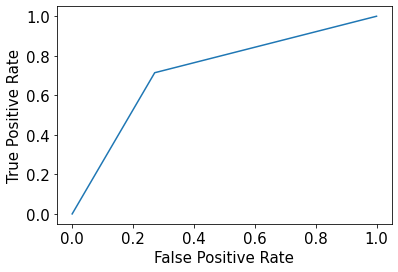

accuracy: 0.7222222222222222


Text(28.0, 0.5, 'Predicted')

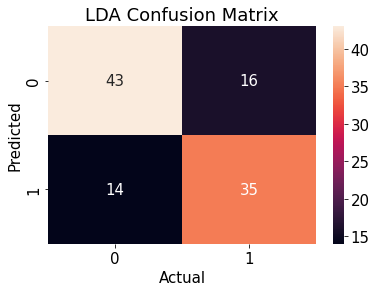

In [70]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.rcParams.update({'font.size':15})
print('accuracy:', metrics.accuracy_score(y_test, predictions))
plt.title("LDA Confusion Matrix")
plt.rcParams.update({'font.size':15})
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [53]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [54]:
gradient = GaussianNB()

In [55]:
gradient.fit(x_train, y_train)

GaussianNB()

In [56]:
from sklearn.metrics import confusion_matrix, classification_report


In [57]:
# check the model's performance on test data
predictions = gradient.predict(x_test)

In [58]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

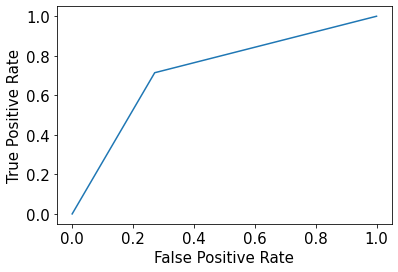

accuracy: 0.7222222222222222


Text(28.0, 0.5, 'Predicted')

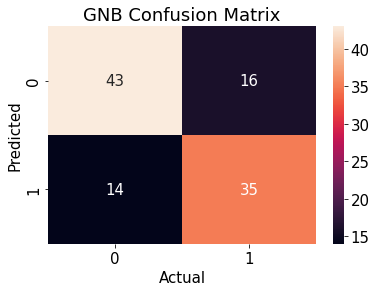

In [69]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy:', metrics.accuracy_score(y_test, predictions))

plt.title("GNB Confusion Matrix")
plt.rcParams.update({'font.size':15})
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [60]:
#LARS model
from sklearn import linear_model
lars = linear_model.Lasso()

In [61]:
lars.fit(x_train, y_train)

Lasso()

In [62]:
from sklearn.metrics import confusion_matrix, classification_report


In [63]:
# check the model's performance on test data
predictionsLars = gradient.predict(x_test)

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictionsLars)

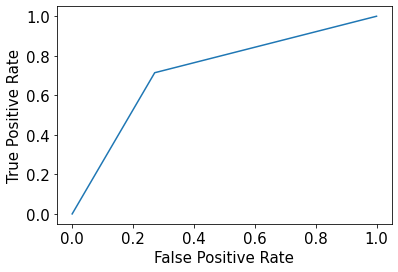

accuracy: 0.7222222222222222


Text(28.0, 0.5, 'Predicted')

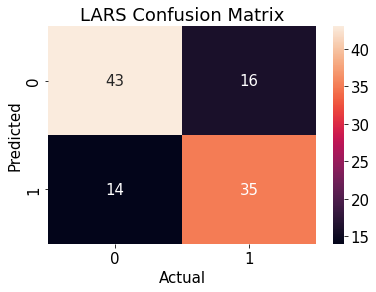

In [68]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy:', metrics.accuracy_score(y_test, predictionsLars))
plt.title("LARS Confusion Matrix")
plt.rcParams.update({'font.size':15})

sns.heatmap(confusion_matrix(y_test, predictionsLars), annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')